# Cross-validation of FLAT output

Processing data and cross-validation techniques

**Original code:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Conceptualization & Methodological review :**  [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Updates, Modifications:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Funding:** The World Bank (contract number: 7190531), [KTH](https://www.kth.se/en/itm/inst/energiteknik/forskning/desa/welcome-to-the-unit-of-energy-systems-analysis-kth-desa-1.197296)

In [1]:
# Importing necessary modules

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
import os
from earthpy import clip as cl
from shapely.geometry import Point, Polygon
%matplotlib inline

### Importing, projecting and Plotting basemap

In [2]:
path_shp = r"N:\Agrodem\Downscaling\Input_Data\vectors\gadm36_MOZ_shp"
name_shp = "gadm36_MOZ_0.shp"
admin_gdf = gpd.read_file(path_shp + "\\" + name_shp)

In [3]:
# Reproject data in to Ordnance Survey GB coordinates
admin_gdf_prj = admin_gdf.to_crs({'init': 'epsg:32737'})

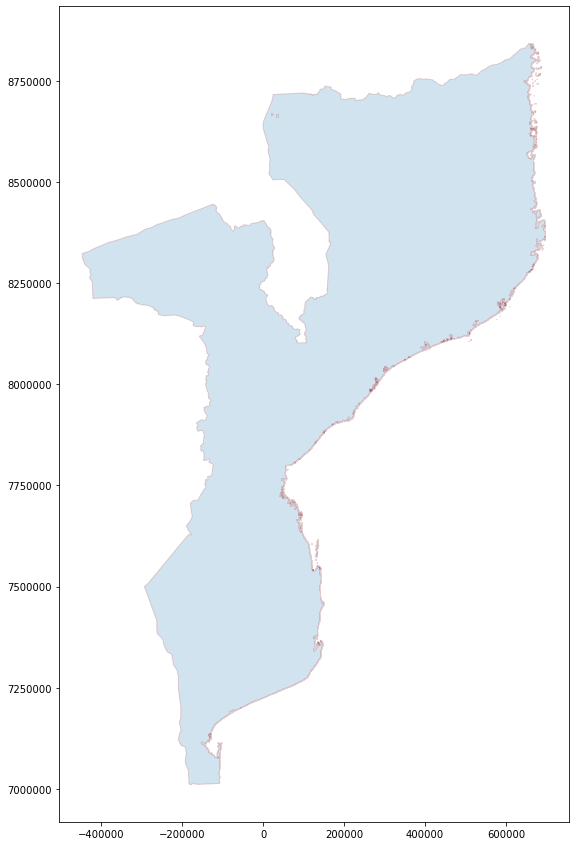

In [4]:
# Plot the data
fig, ax = plt.subplots(figsize=(15, 15))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
ax.set_aspect('equal', 'box')

# Save plot as figure 
#plt.savefig('Maize_Harv_Area_2017.png', bbox_inches='tight')

### Importing Downscaled crop - setting geodf, projecting and plotting

In [5]:
# Import data 
path = r"N:\Agrodem\Irrigation_model\Input_data\Downscaled_Crop"
name_of_file = "Maize_Moz_1km_2017_downscaled.csv"

In [6]:
# Import csv as pandas dataframe
downscaled_maize = pd.read_csv(path + "\\" + name_of_file)

In [7]:
# Setting a geo dataframe - appointing geometry attribute
downscaled_maize['geometry'] = list(zip(downscaled_maize['lon'], downscaled_maize['lat']))
downscaled_maize['geometry'] = downscaled_maize['geometry'].apply(Point)
downscaled_maize = gpd.GeoDataFrame(downscaled_maize, geometry='geometry', crs={'init': 'epsg:4326'})

In [8]:
downscaled_maize_prj = downscaled_maize.to_crs({'init': 'epsg:32737'})

In [9]:
downscaled_maize_prj.head(4)

,Pixel,State,lon,lat,Crop,Fraction,MaizeArea,geometry
0,0,Guro,33.75358,-16.41358,Maize,7.000000e-08,0.000007,POINT (-60816.741 8178045.879)
1,1,Guro,33.76291,-16.41381,Maize,1.214613e-01,12.146135,POINT (-59816.392 8178046.263)
2,2,Guro,33.77224,-16.41404,Maize,5.111816e-02,5.111816,POINT (-58816.058 8178046.601)
3,3,Guro,33.78156,-16.41428,Maize,1.253569e+00,125.356932,POINT (-57816.782 8178045.755)


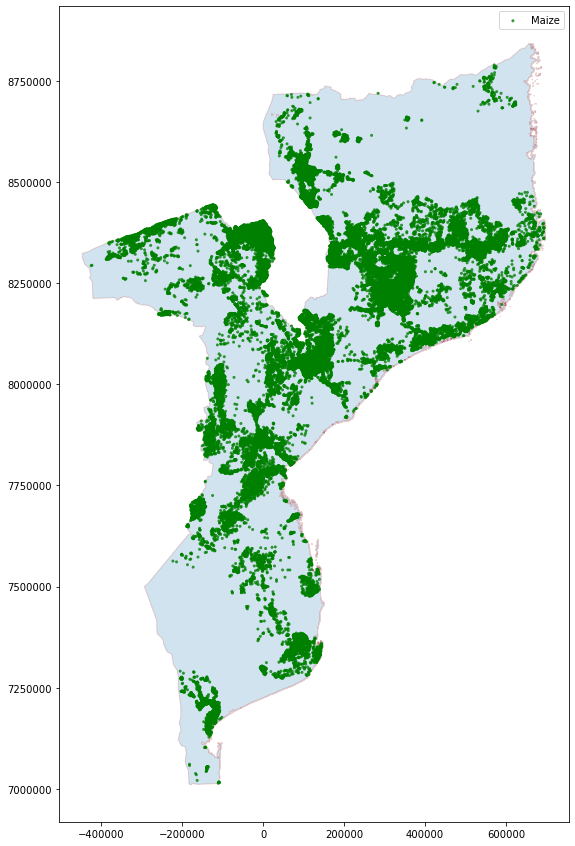

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
downscaled_maize_prj.plot(ax=ax, color='green', edgecolor='none', figsize=(20, 20), alpha=0.8, label='Maize', marker='.')
#downscaled_maize_prj.plot(ax=ax, column='MaizeArea', figsize=(20, 20), alpha=0.8, label='Maize', legend = True)
ax.set_aspect('equal', 'box')
leg = ax.legend()
 
# Save plot as figure 
#plt.savefig('Maize_Harv_Area_2017.png', bbox_inches='tight')

### Importing, projecting and clipping and buffering sample survey points

In [11]:
path_shp = r"N:\Agrodem\Survey_Data"
name_shp = "Survey_Points_Maize_epsg_4326.gpkg"
point_gdf = gpd.read_file(path_shp + "\\" + name_shp, layer='Survey_Points_Maize_epsg_4326')

In [12]:
# Adding a new index
point_gdf = point_gdf.reset_index()

In [13]:
# Reproject data in to Ordnance Survey GB coordinates
point_gdf_prj = point_gdf.to_crs({'init': 'epsg:32737'})

In [14]:
# Clipping data that go out of the country borders
poly = admin_gdf_prj.geometry[0]
points_clip = point_gdf_prj[point_gdf_prj.geometry.intersects(poly)]

## Or importing clipped shapefile
#path_shp = r"N:\Agrodem\Downscaling\Output_Data\Crossvalidation"
#name_shp = "Survey_Points_Projected.shp"
#points_clip = gpd.read_file(path_shp + "\\" + name_shp)

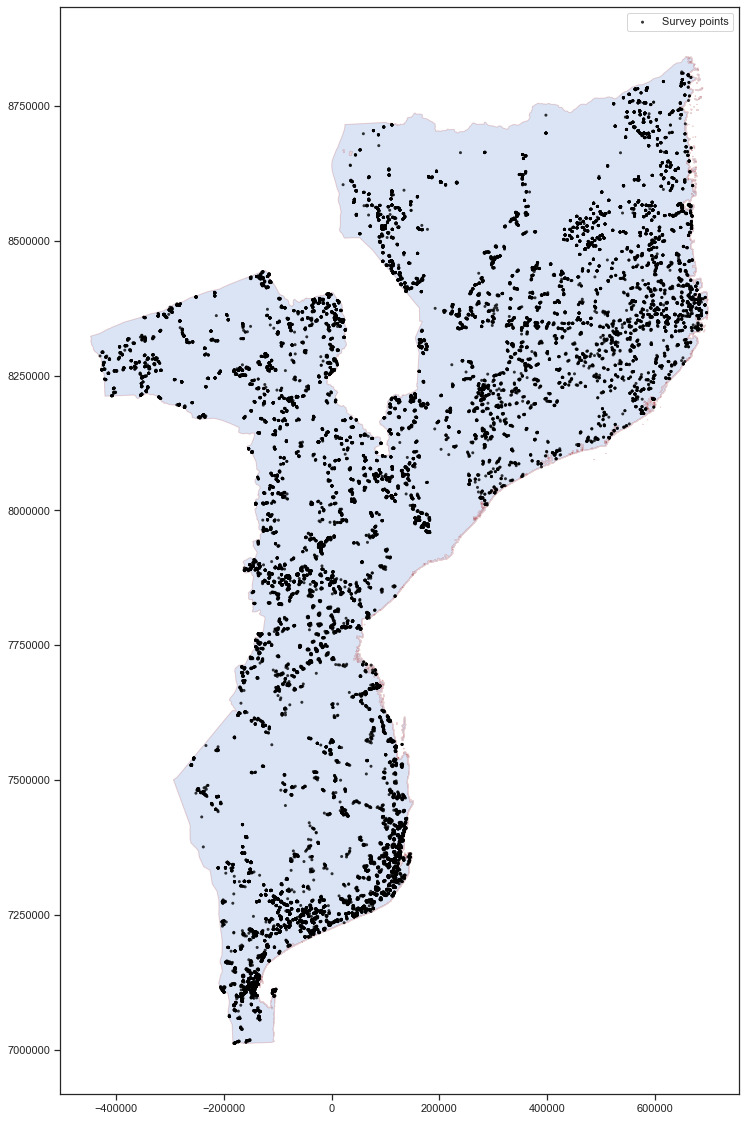

In [337]:
# Plot the data
fig, ax = plt.subplots(figsize=(20, 20))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
points_clip.plot(ax=ax, figsize=(20, 20), alpha=0.8, color='black', edgecolor='none', marker='.', label='Survey points', legend = True)
ax.set_aspect('equal', 'box')
leg = ax.legend()

# Save plot as figure 
#plt.savefig('Maize_Harv_Area_2017.png', bbox_inches='tight')

#### Adding a buffer to points

In [305]:
# Adding buffer to points
buffer_area = 500
points_clip_buffer = points_clip.copy()
points_clip_buffer['geometry'] = points_clip.buffer(buffer_area)

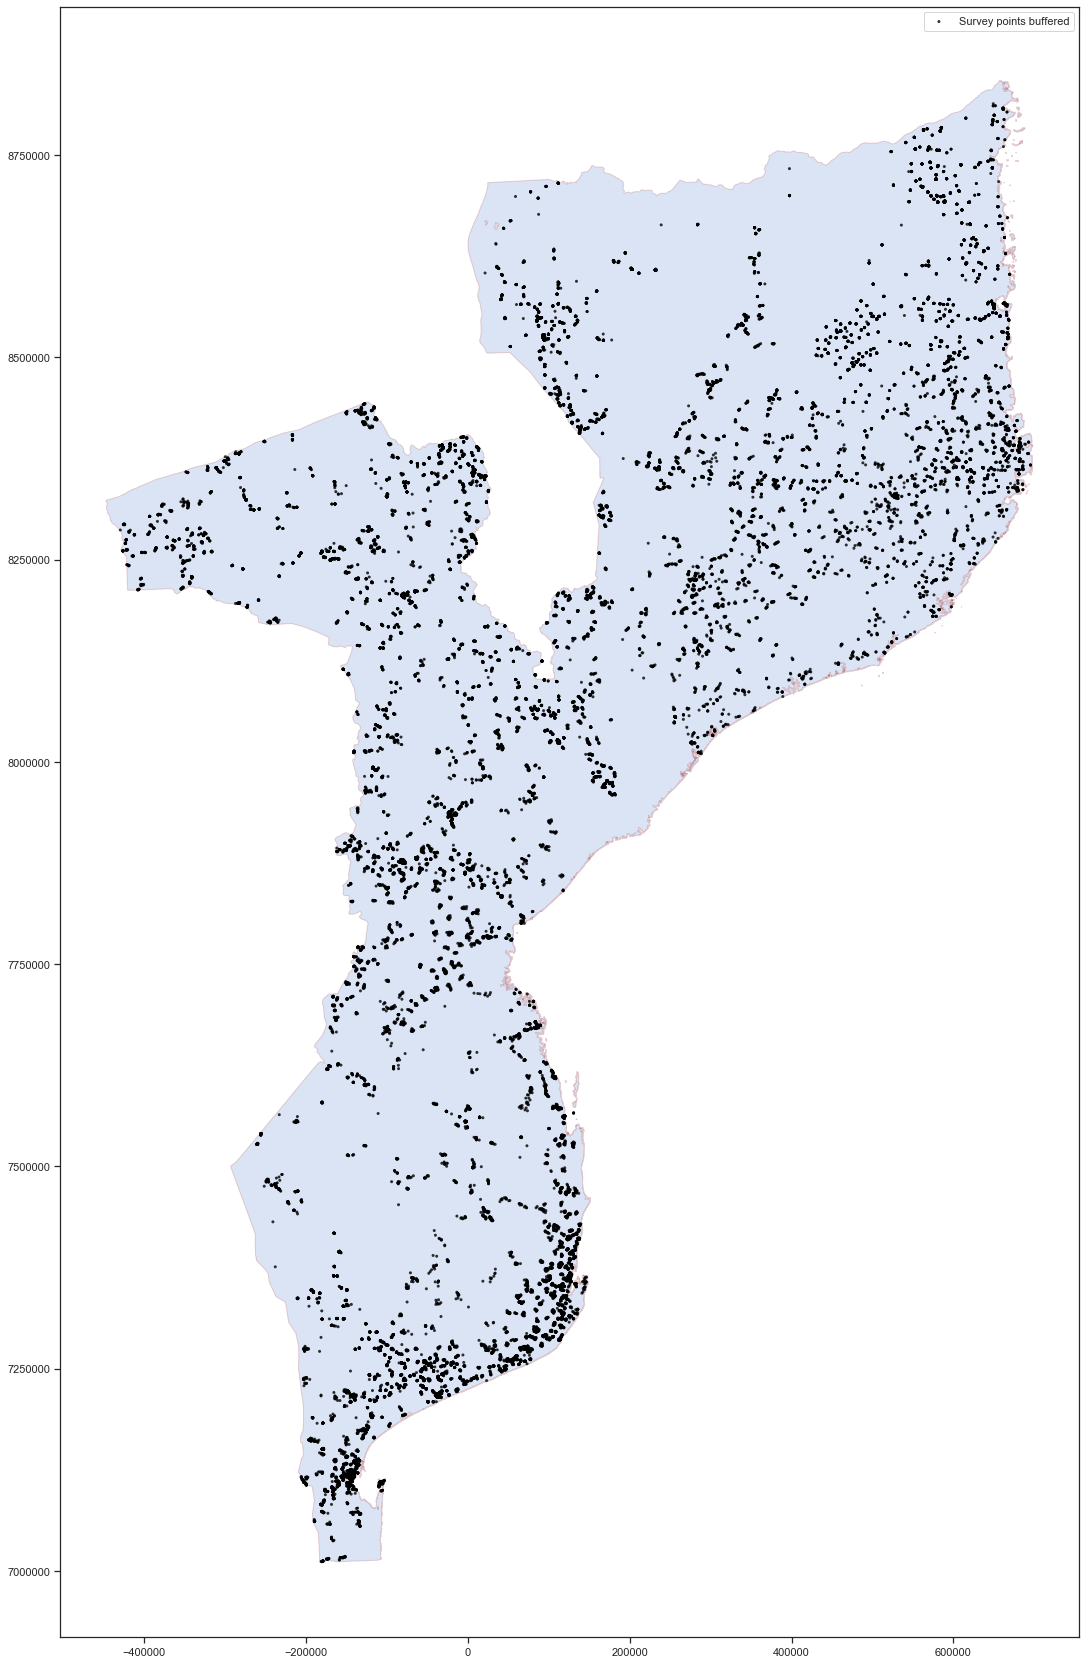

In [306]:
# Plot the data
fig, ax = plt.subplots(figsize=(30, 30))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
points_clip_buffer.plot(ax=ax, color='Blue', alpha=0.2)
points_clip.plot(ax=ax, figsize=(20, 20), alpha=0.8, color='black', edgecolor='none', marker='.', label='Survey points buffered', legend = True)
ax.set_aspect('equal', 'box')
leg = ax.legend()

# Save plot as figure 
#plt.savefig('Maize_Harv_Area_2017.png', bbox_inches='tight')

In [307]:
# Fixing dtypes of the dataframe so that spatial join works properly (for all columns)
points_clip_buffer.dtypes

index                   int64
uid                   float64
BASICA_AREA            object
Zone                  float64
total_volume_prod      object
geometry             geometry
dtype: object

In [308]:
## Change string "NA" values to float64 0
#points_clip_buffer['BASICA_AREA'] = points_clip_buffer['BASICA_AREA'].replace("NA", 0)
#points_clip_buffer['total_volume_prod'] = points_clip_buffer['total_volume_prod'].replace("NA", 0)
#
## Finally change dtypes from object to float64
#points_clip_buffer.astype({'BASICA_AREA': 'float64', 'total_volume_prod':'float64'}).dtypes

points_clip_buffer["BASICA_AREA"] = pd.to_numeric(points_clip_buffer.BASICA_AREA, errors='coerce')
points_clip_buffer["total_volume_prod"] = pd.to_numeric(points_clip_buffer.total_volume_prod, errors='coerce')

# Change NaN values 
values = {'BASICA_AREA': 0, 'total_volume_prod': 0}
points_clip_buffer.fillna(value=values)

,index,uid,BASICA_AREA,Zone,total_volume_prod,geometry
0,0,1.0,0.1140,36.0,600.0,"POLYGON ((-343341.533 8249731.540, -343343.941..."
1,1,5.0,0.5148,36.0,250.0,"POLYGON ((-345936.936 8248949.290, -345939.344..."
2,2,7.0,0.2728,36.0,180.0,"POLYGON ((-346203.932 8248902.322, -346206.339..."
3,3,9.0,0.1924,36.0,100.0,"POLYGON ((-345930.456 8249004.958, -345932.863..."
4,4,11.0,0.2160,36.0,60.0,"POLYGON ((-348557.748 8248664.610, -348560.156..."
...,...,...,...,...,...,...
29475,29475,104918.0,0.3920,37.0,250.0,"POLYGON ((483952.461 8504748.387, 483950.053 8..."
29476,29476,104923.0,0.3700,37.0,200.0,"POLYGON ((484054.461 8504529.387, 484052.053 8..."
29477,29477,104927.0,0.1000,37.0,350.0,"POLYGON ((484138.461 8504431.387, 484136.053 8..."
29478,29478,104932.0,0.2200,37.0,400.0,"POLYGON ((664619.591 8564383.250, 664617.184 8..."


In [309]:
points_clip_buffer.dtypes

index                   int64
uid                   float64
BASICA_AREA           float64
Zone                  float64
total_volume_prod     float64
geometry             geometry
dtype: object

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


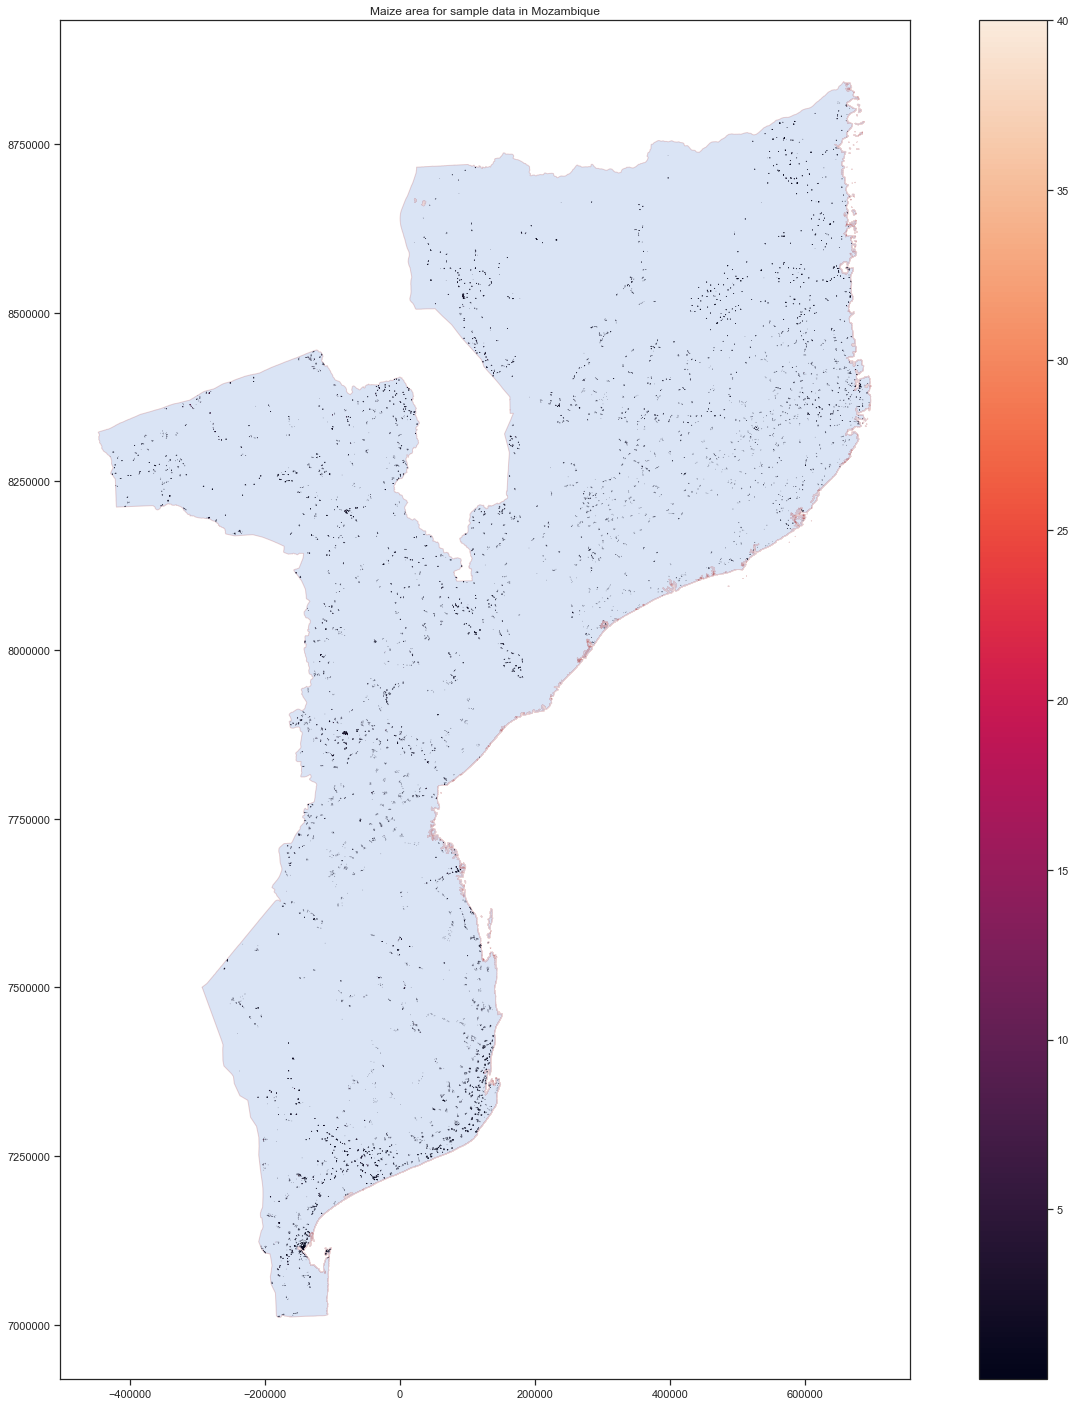

In [378]:
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 25))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
points_clip_buffer.sort_values('BASICA_AREA', ascending=True).plot(ax=ax, column='BASICA_AREA', legend=True, edgecolor='none', figsize=(20, 20), alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Maize area for sample data in Mozambique'.format(""))

In [310]:
print("There are {x} points in the survey. The following code intersects the points of downscaled crop (maize) that fall within the buffer of {y}m. Then the summary of MaizeArea is estimated per sample point.".format(x = len(points_clip_buffer), y = buffer_area))

There are 28158 points in the survey. The following code intersects the points of downscaled crop (maize) that fall within the buffer of 500m. Then the summary of MaizeArea is estimated per sample point.


### Spatial join and groupby for downscaled vectors

In [311]:
#Spatial join
DS_maize_by_survey_point = gpd.sjoin(downscaled_maize_prj, points_clip_buffer, op='intersects', how='right')

#Aggregate results per sample point
DS_maize_per_sp = DS_maize_by_survey_point.dissolve(by='index_right', aggfunc='sum')

# Check for dublicates
#maize_per_sp_dublic = maize_per_sp[maize_per_sp.duplicated(['geometry'], keep=False)]

In [312]:
len(DS_maize_per_sp)

28158

In [313]:
DS_maize_per_sp.head(5)

,geometry,index_left,Pixel,lon,lat,Fraction,MaizeArea,index,uid,BASICA_AREA,Zone,total_volume_prod
index_right,,,,,,,,,,,,
0,"POLYGON ((-343341.533 8249731.540, -343343.941...",0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.1140,36.0,600.0
1,"POLYGON ((-345936.936 8248949.290, -345939.344...",0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.5148,36.0,250.0
2,"POLYGON ((-346203.932 8248902.322, -346206.339...",0.0,0.0,0.0,0.0,0.0,0.0,2,7.0,0.2728,36.0,180.0
3,"POLYGON ((-345930.456 8249004.958, -345932.863...",0.0,0.0,0.0,0.0,0.0,0.0,3,9.0,0.1924,36.0,100.0
4,"POLYGON ((-348557.748 8248664.610, -348560.156...",0.0,0.0,0.0,0.0,0.0,0.0,4,11.0,0.2160,36.0,60.0


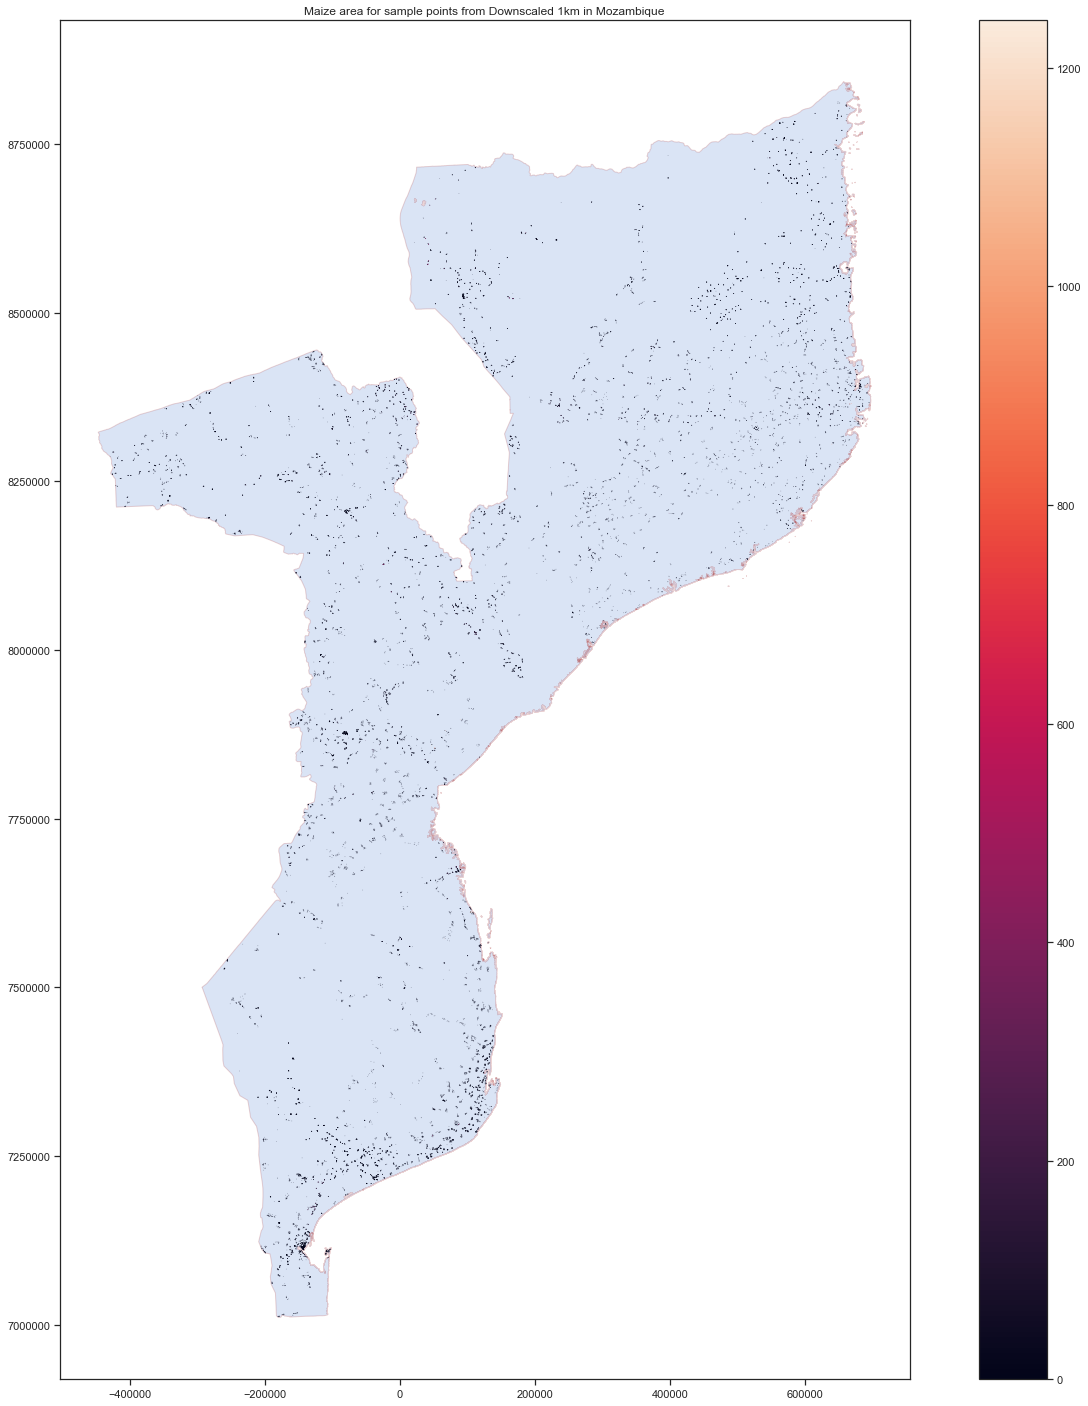

In [380]:
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 25))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
DS_maize_per_sp.sort_values('MaizeArea', ascending=True).plot(ax=ax, column='MaizeArea', legend=True, edgecolor='none', figsize=(20, 20), alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Maize area for sample points from {} in Mozambique'.format("Downscaled 1km"))

### Importing Harvest Choice 10km (vector) crop - setting geodf, projecting and plotting

In [315]:
# Import data 
path = r"N:\Agrodem\Downscaling\Output_Data\Crossvalidation"
name_of_file = "Maize_HC_10km_proj.shp"

# Import csv as pandas dataframe
HC_maize = gpd.read_file(path + "\\" + name_of_file)

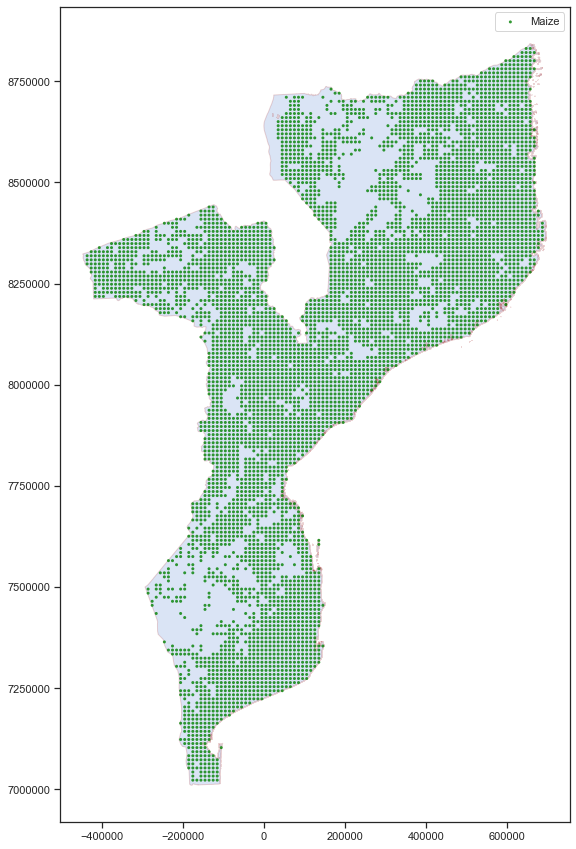

In [316]:
fig, ax = plt.subplots(figsize=(15, 15))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
HC_maize.plot(ax=ax, color='green', edgecolor='none', figsize=(20, 20), alpha=0.8, label='Maize', marker='.')
#downscaled_maize_prj.plot(ax=ax, column='MaizeArea', figsize=(20, 20), alpha=0.8, label='Maize', legend = True)
ax.set_aspect('equal', 'box')
leg = ax.legend()
 
# Save plot as figure 
#plt.savefig('Maize_Harv_Area_2017.png', bbox_inches='tight')

In [317]:
#Spatial join
HC_maize_by_survey_point = gpd.sjoin(HC_maize, points_clip_buffer, op='intersects', how='right')

#Aggregate results per sample point
HC_maize_per_sp = HC_maize_by_survey_point.dissolve(by='index_right', aggfunc='sum')

In [318]:
len(HC_maize_per_sp)

28158

In [319]:
HC_maize_per_sp.head(5)

,geometry,index_left,MaizeArea,index,uid,BASICA_AREA,Zone,total_volume_prod
index_right,,,,,,,,
0,"POLYGON ((-343341.533 8249731.540, -343343.941...",0.0,0.0,0,1.0,0.1140,36.0,600.0
1,"POLYGON ((-345936.936 8248949.290, -345939.344...",0.0,0.0,1,5.0,0.5148,36.0,250.0
2,"POLYGON ((-346203.932 8248902.322, -346206.339...",0.0,0.0,2,7.0,0.2728,36.0,180.0
3,"POLYGON ((-345930.456 8249004.958, -345932.863...",0.0,0.0,3,9.0,0.1924,36.0,100.0
4,"POLYGON ((-348557.748 8248664.610, -348560.156...",0.0,0.0,4,11.0,0.2160,36.0,60.0


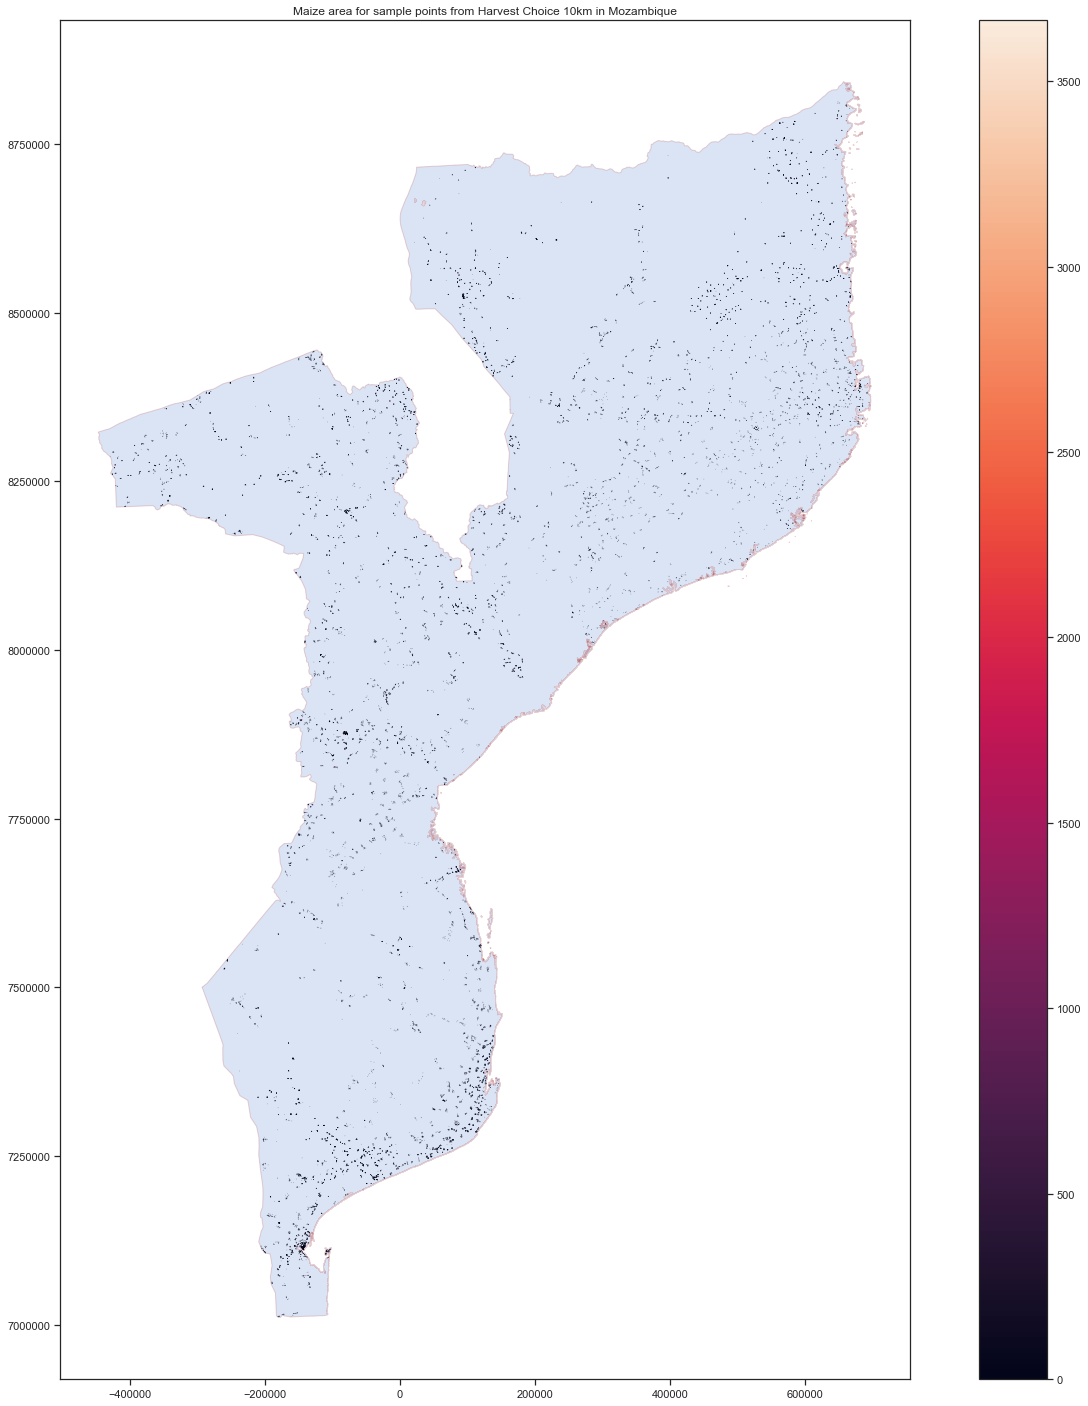

In [381]:
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 25))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
HC_maize_per_sp.sort_values('MaizeArea', ascending=True).plot(ax=ax, column='MaizeArea', legend=True, edgecolor='none', figsize=(20, 20), alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Maize area for sample points from {} in Mozambique'.format("Harvest Choice 10km"))

### Exports

In [321]:
## Define output path
#path = r"N:\Agrodem\Downscaling\Output_Data\Crossvalidation"
#
##Moz admin0 projected
#admin_gdf_prj.to_file(os.path.join(path,"{c}.shp".format(c="Moz_admon0_Projected")))
#
##Survey points projected
#points_clip.to_file(os.path.join(path,"{c}.shp".format(c="Survey_Points_Projected")))
#
##Survey points buffered projected
#points_clip_buffer.to_file(os.path.join(path,"{c}.shp".format(c="Survey_Points_buffered")))
#
##Downscaled Maize points projected
#downscaled_maize_prj.to_file(os.path.join(path,"{c}.shp".format(c="Maize_Projected")))

### Scatterplots

In [322]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

### General Stats of survey points

In [373]:
points_clip_buffer["BASICA_AREA"].describe()

count    26285.000000
mean         0.650805
std          0.958498
min          0.000100
25%          0.205000
50%          0.400000
75%          0.760000
max         40.000000
Name: BASICA_AREA, dtype: float64

In [323]:
DS_maize_per_sp.columns

Index(['geometry', 'index_left', 'Pixel', 'lon', 'lat', 'Fraction',
       'MaizeArea', 'index', 'uid', 'BASICA_AREA', 'Zone',
       'total_volume_prod'],
      dtype='object')

In [324]:
HC_maize_per_sp.columns

Index(['geometry', 'index_left', 'MaizeArea', 'index', 'uid', 'BASICA_AREA',
       'Zone', 'total_volume_prod'],
      dtype='object')

## Method A - Spatial join in geopandas

#### Scatterplot of Observed Vs Downscaled values of harveste area

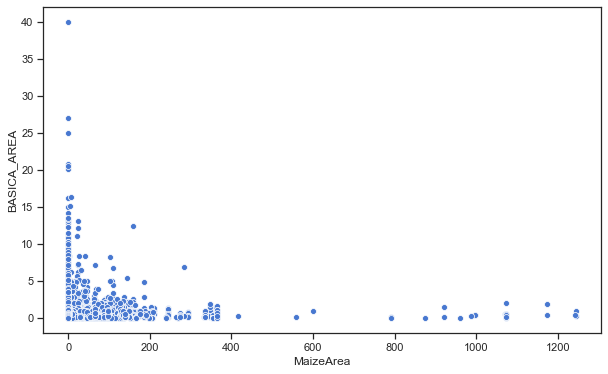

In [326]:
plt.figure(figsize=(10, 6))
sns.set(context='notebook', style='ticks', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = sns.scatterplot(DS_maize_per_sp["MaizeArea"], 
                     DS_maize_per_sp["BASICA_AREA"])

# Save plot as figure 
plt.savefig('Survey_Vs_Downscaled_Buffer_500m', bbox_inches='tight')

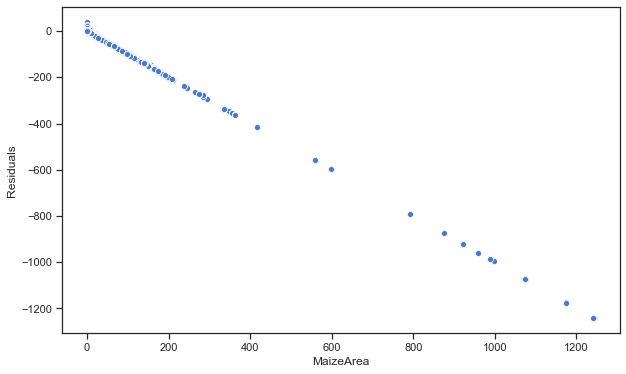

In [327]:
DS_maize_per_sp["Residuals"] = DS_maize_per_sp["BASICA_AREA"] - DS_maize_per_sp["MaizeArea"]

plt.figure(figsize=(10, 6))
sns.set(context='notebook', style='ticks', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = sns.scatterplot(DS_maize_per_sp["MaizeArea"], 
                     DS_maize_per_sp["Residuals"])

# Save plot as figure 
plt.savefig('Survey_Vs_Downscaled_Buffer_500m_Residuals', bbox_inches='tight')

#### Scatterplot of Observed Vs Harvest Choise values of harveste area

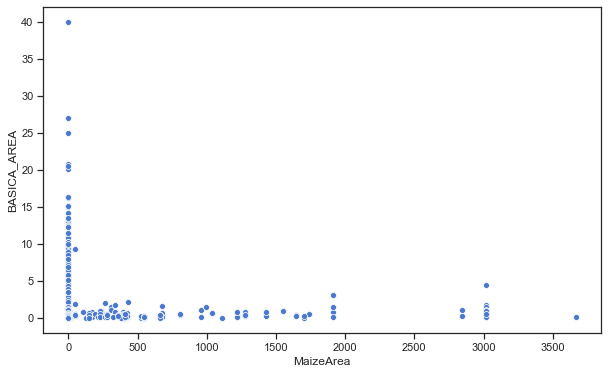

In [328]:
plt.figure(figsize=(10, 6))
sns.set(context='notebook', style='ticks', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = sns.scatterplot(HC_maize_per_sp["MaizeArea"], 
                     HC_maize_per_sp["BASICA_AREA"])

# Save plot as figure 
plt.savefig('Survey_Vs_HarvestChoise_Buffer_500m', bbox_inches='tight')

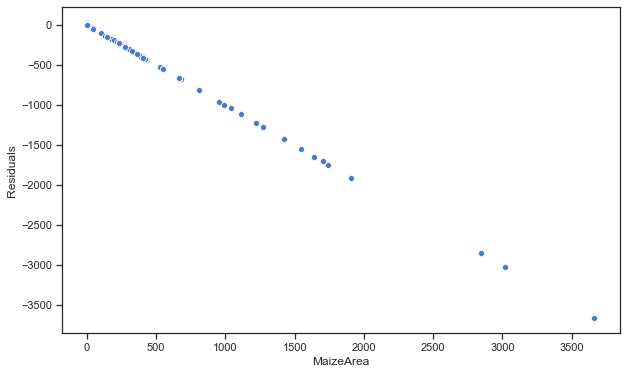

In [329]:
HC_maize_per_sp["Residuals"] = HC_maize_per_sp["BASICA_AREA"] - HC_maize_per_sp["MaizeArea"]

plt.figure(figsize=(10, 6))
sns.set(context='notebook', style='ticks', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = sns.scatterplot(HC_maize_per_sp["MaizeArea"], 
                     HC_maize_per_sp["Residuals"])

# Save plot as figure 
plt.savefig('Survey_Vs_HarvestChoise_Buffer_500m_Residuals', bbox_inches='tight')

#### Harvest Choice Vs Downscaled values

In [330]:
merged_per_sp = pd.merge(DS_maize_per_sp, HC_maize_per_sp, on="index")

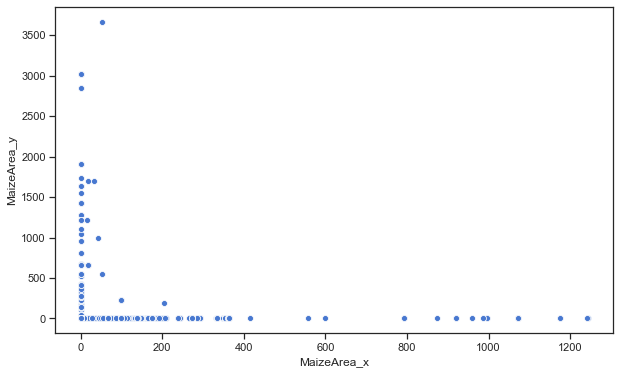

In [331]:
plt.figure(figsize=(10, 6))
sns.set(context='notebook', style='ticks', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = sns.scatterplot(merged_per_sp["MaizeArea_x"], 
                     merged_per_sp["MaizeArea_y"])

# Save plot as figure 
plt.savefig('HarvestChoise_Vs_Downscaled_Buffer_500m', bbox_inches='tight')

## Method B - Binary Analysis

### Downscaled dataset

In [434]:
#total samples
n_DS = len(DS_maize_per_sp)

# True Possitives
TP_DS = len(DS_maize_per_sp[(DS_maize_per_sp["MaizeArea"] > 0) & (DS_maize_per_sp["BASICA_AREA"] > 0)])

# True Negatives
TN_DS = len(DS_maize_per_sp[(DS_maize_per_sp["MaizeArea"] == 0) & (DS_maize_per_sp["BASICA_AREA"] == 0)])

# False positives
FP_DS = len(DS_maize_per_sp[(DS_maize_per_sp["MaizeArea"] > 0) & (DS_maize_per_sp["BASICA_AREA"] == 0)])

# False Negatives
FN_DS = len(DS_maize_per_sp[(DS_maize_per_sp["MaizeArea"] == 0) & (DS_maize_per_sp["BASICA_AREA"] > 0)])

## Diagnostics

# Overall, how often is the binary classification of values correct
Accuracy_DS = (TP_DS+TN_DS)/n

# Overall, how often is the binary classification of values wrong
Misclassification_Rate_DS = (FP_DS+FN_DS)/n

# When survey indicates maize, how often does GIS predicts maize?
Recall_DS = TP_DS/(FN_DS + TP_DS)

# When GIS predicts maize, fow often is it correct?
Precision_DS = TP_DS/(TP_DS + FP_DS)

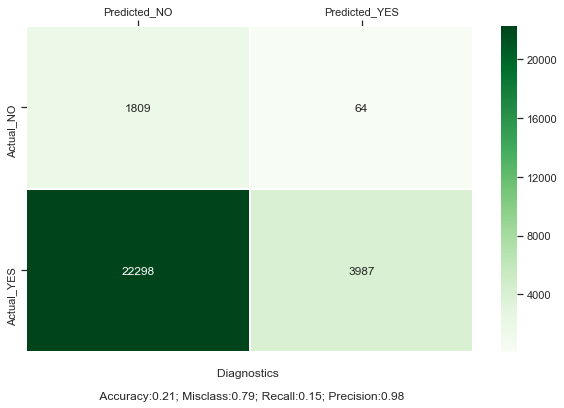

In [555]:
conf_m_DS = [[TN_DS, FP_DS], [FN_DS, TP_DS]]

plt.figure(figsize=(10, 6))
ax= plt.subplot()
akws = {"ha": 'center',"va": 'center_baseline'}

sns_plot = sns.heatmap(conf_m_DS, linewidths=.5, annot = True, fmt='g', cmap='Greens', annot_kws=akws, ax = ax)

# labels, title and ticks
#ax.set_xlabel('Predicted labels');
#ax.set_ylabel('True labels'); 

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_ticklabels(['Predicted_NO', 'Predicted_YES']); 
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticklabels(['Actual_NO', 'Actual_YES']);

plt.xlabel('\nDiagnostics \n \n Accuracy:{:0.2f}; Misclass:{:0.2f}; Recall:{:0.2f}; Precision:{:0.2f}'.
           format(Accuracy_DS, Misclassification_Rate_DS, Recall_DS, Precision_DS))

#ax.set_title('Confusion Matrix'); 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Save plot as figure 
plt.savefig('Confusion_Matrix_Downscaled_Buffer_500m', dpi=150)

plt.show() # ta-da!

### Harvest Choice dataset

In [435]:
#total samples
n_HC = len(HC_maize_per_sp)

# True Possitives
TP_HC = len(HC_maize_per_sp[(HC_maize_per_sp["MaizeArea"] > 0) & (HC_maize_per_sp["BASICA_AREA"] > 0)])

# True Negatives
TN_HC = len(HC_maize_per_sp[(HC_maize_per_sp["MaizeArea"] == 0) & (HC_maize_per_sp["BASICA_AREA"] == 0)])

# False positives
FP_HC = len(HC_maize_per_sp[(HC_maize_per_sp["MaizeArea"] > 0) & (HC_maize_per_sp["BASICA_AREA"] == 0)])

# False Negatives
FN_HC = len(HC_maize_per_sp[(HC_maize_per_sp["MaizeArea"] == 0) & (HC_maize_per_sp["BASICA_AREA"] > 0)])

## Diagnostics

# Overall, how often is the binary classification of values correct
Accuracy_HC = (TP_HC+TN_HC)/n

# Overall, how often is the binary classification of values wrong
Misclassification_Rate_HC = (FP_HC+FN_HC)/n

# When survey indicates maize, how often does GIS predicts maize?
Recall_HC = TP_HC/(FN_HC + TP_HC)

# When GIS predicts maize, fow often is it correct?
Precision_HC = TP_HC/(TP_HC + FP_HC)

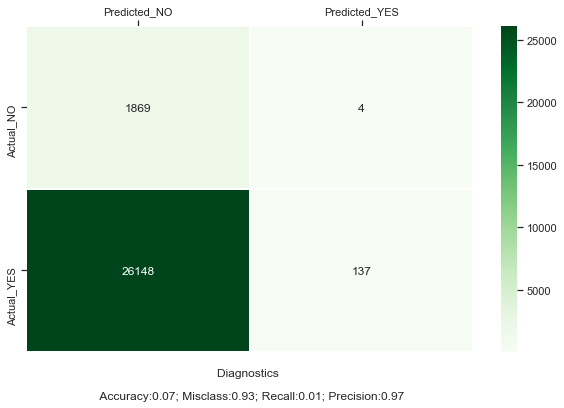

In [557]:
conf_m_DS = [[TN_HC, FP_HC], [FN_HC, TP_HC]]

plt.figure(figsize=(10, 6))
ax= plt.subplot()
akws = {"ha": 'center',"va": 'center_baseline'}

sns_plot = sns.heatmap(conf_m_DS, linewidths=.5, annot = True, fmt='g', cmap='Greens', annot_kws=akws, ax = ax)

# labels, title and ticks
#ax.set_xlabel('Predicted labels');
#ax.set_ylabel('True labels'); 

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_ticklabels(['Predicted_NO', 'Predicted_YES']); 
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticklabels(['Actual_NO', 'Actual_YES']);

plt.xlabel('\nDiagnostics \n \n Accuracy:{:0.2f}; Misclass:{:0.2f}; Recall:{:0.2f}; Precision:{:0.2f}'.
           format(Accuracy_HC, Misclassification_Rate_HC, Recall_HC, Precision_HC))

#ax.set_title('Confusion Matrix'); 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Save plot as figure 
plt.savefig('Confusion_Matrix_HarvestChoise_Buffer_500m', dpi=150)

plt.show() # ta-da!

In [436]:
Accuracy_DS > Accuracy_HC

True

In [437]:
Misclassification_Rate_DS < Misclassification_Rate_HC

True

In [438]:
Recall_DS > Recall_HC

True

In [439]:
Precision_DS > Precision_HC

True

## Method C - Zonal statistics in Qgis

In [109]:
# Import data 
path = r"N:\Agrodem\Irrigation_model\Input_data\Downscaled_Crop"
name_of_file = "Survey_Points_5km_ZonalStats.shp"

# Import csv as pandas dataframe
zonal_Stats_qgis = gpd.read_file(path_shp + "\\" + name_of_file)

In [110]:
zonal_Stats_qgis.head(5)

,FID,HC_count,HC_sum,HC_mean,DS_count,DS_sum,DS_mean,geometry
0,0,0.777273,30.460153,39.188497,58.0,2169.725774,37.409065,"POLYGON ((104614.268 8528520.775, 104590.192 8..."
1,1,0.777273,30.455508,39.182521,59.0,2209.394622,37.447366,"POLYGON ((104667.401 8528560.112, 104643.325 8..."
2,2,0.777273,30.455508,39.182521,59.0,2209.394622,37.447366,"POLYGON ((104667.401 8528560.112, 104643.325 8..."
3,3,0.777273,25.039867,32.215030,59.0,2160.661091,36.621374,"POLYGON ((104640.620 8528798.825, 104616.543 8..."
4,4,0.777273,25.039867,32.215030,59.0,2160.661091,36.621374,"POLYGON ((104640.620 8528798.825, 104616.543 8..."


In [115]:
zonal_Stats_qgis.rename(columns={'FID': 'index'}, inplace=True)

In [117]:
Zonal_Stars_per_sp = pd.merge(zonal_Stats_qgis, points_clip_buffer, on="index")

In [119]:
Zonal_Stars_per_sp.head(2)

,index,HC_count,HC_sum,HC_mean,DS_count,DS_sum,DS_mean,geometry_x,upa_af,prov,...,e06b,e07a,e07b,e07e,e08a,e08b,e11,e12,a07a,geometry_y
0,0,0.777273,30.460153,39.188497,58.0,2169.725774,37.409065,"POLYGON ((104614.268 8528520.775, 104590.192 8...",10011,1.0,...,7.0,3000.0,1.0,2.0,NaN,NaN,2.0,NaN,36.0,"POLYGON ((104614.268 8528520.775, 104590.192 8..."
1,1,0.777273,30.455508,39.182521,59.0,2209.394622,37.447366,"POLYGON ((104667.401 8528560.112, 104643.325 8...",10012,1.0,...,5.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,36.0,"POLYGON ((104667.401 8528560.112, 104643.325 8..."


#### Scatterplot of Observed Vs Downscaled values of harveste area

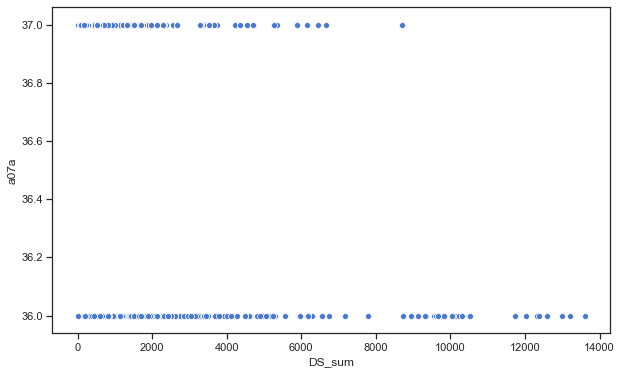

In [123]:
plt.figure(figsize=(10, 6))
sns.set(context='notebook', style='ticks', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = sns.scatterplot(Zonal_Stars_per_sp["DS_sum"], 
                     Zonal_Stars_per_sp["a07a"])

#### Scatterplot of Observed Vs Downscaled values of harveste area

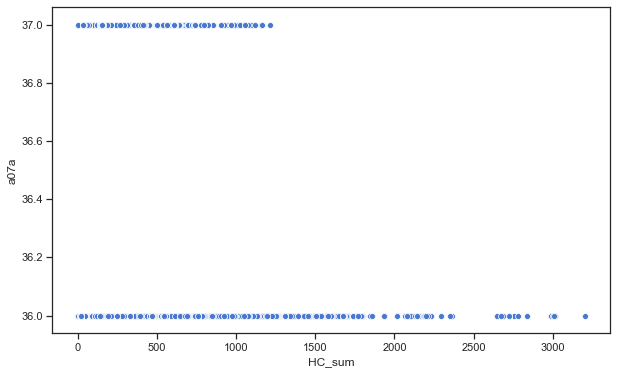

In [124]:
plt.figure(figsize=(10, 6))
sns.set(context='notebook', style='ticks', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = sns.scatterplot(Zonal_Stars_per_sp["HC_sum"], 
                     Zonal_Stars_per_sp["a07a"])

#### Harvest Choice Vs Downscaled values

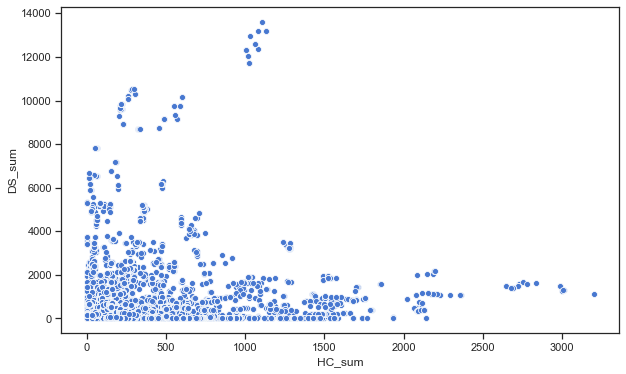

In [125]:
plt.figure(figsize=(10, 6))
sns.set(context='notebook', style='ticks', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = sns.scatterplot(Zonal_Stars_per_sp["HC_sum"], 
                     Zonal_Stars_per_sp["DS_sum"])

#### Other tested scatterplots

In [22]:
sample_df = pd.DataFrame({"id":[1,2,3,4,5,6,7,8,9,10], 
                          "Observed_values":[25,45,65,35,75,15,95,55,85,105], 
                          "Resol":["HC", "DS", "DS", "DS", "HC", "DS", "HC", "HC", "DS", "HC"], 
                          "Simulated_values":[23,78,56,34,90,12,14,45,56,67]}, 
                         columns=["id", "Observed_values", "Resol","Simulated_values"])

In [23]:
sample_df

,id,Observed_values,Resol,Simulated_values
0,1,25,HC,23
1,2,45,DS,78
2,3,65,DS,56
3,4,35,DS,34
4,5,75,HC,90
5,6,15,DS,12
6,7,95,HC,14
7,8,55,HC,45
8,9,85,DS,56
9,10,105,HC,67


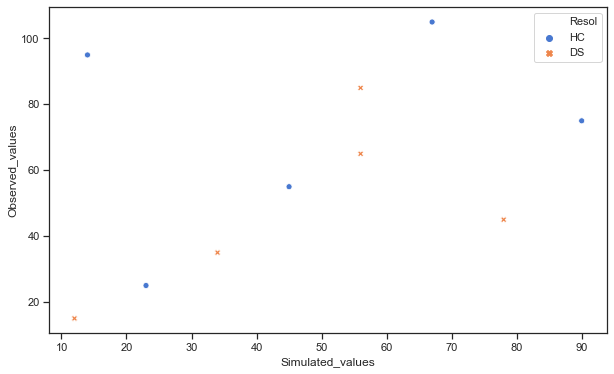

In [24]:
plt.figure(figsize=(10, 6))
sns.set(context='notebook', style='ticks', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = sns.scatterplot(sample_df["Simulated_values"], 
                     sample_df["Observed_values"],
                     hue=sample_df["Resol"], 
                     style = sample_df["Resol"])

In [25]:
sample_df_2 = pd.DataFrame({"id":[1,2,3,4,5,6,7,8,9,10], 
                          "HarvChoice":[25,45,65,35,75,15,95,55,85,105],
                          "DownScaled":[23,78,56,34,90,12,14,45,56,67]}, 
                         columns=["id", "HarvChoice", "DownScaled"])

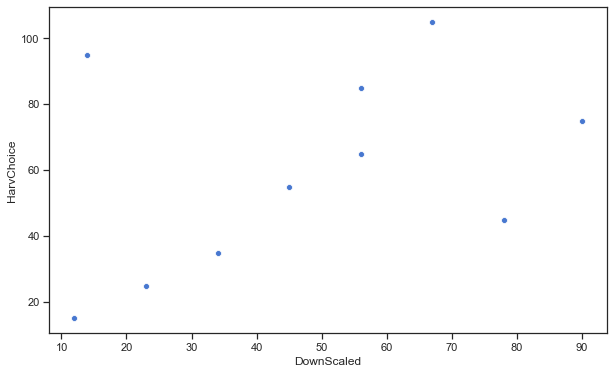

In [26]:
plt.figure(figsize=(10, 6))
sns.set(context='notebook', style='ticks', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = sns.scatterplot(sample_df_2["DownScaled"], 
                     sample_df_2["HarvChoice"])

In [27]:
points_clip.columns

Index(['index', 'upa_af', 'prov', 'dist', 'upa', 'af', 'e02', 'e02b', 'e03',
       'e04b', 'e06b', 'e07a', 'e07b', 'e07e', 'e08a', 'e08b', 'e11', 'e12',
       'a07a', 'geometry'],
      dtype='object')

In [28]:
points_clip

,index,upa_af,prov,dist,upa,af,e02,e02b,e03,e04b,e06b,e07a,e07b,e07e,e08a,e08b,e11,e12,a07a,geometry
0,0,10011,1.0,1.0,1001.0,1.0,2.0,1.0,2.0,1.0,7.0,3000.0,1.0,2.0,NaN,NaN,2.0,NaN,36.0,POINT (99614.268 8528520.775)
1,1,10012,1.0,1.0,1001.0,2.0,1.0,2.0,1.0,1.0,5.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,36.0,POINT (99667.401 8528560.112)
2,2,10012,1.0,1.0,1001.0,2.0,2.0,2.0,2.0,1.0,5.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,36.0,POINT (99667.401 8528560.112)
3,3,10014,1.0,1.0,1001.0,4.0,1.0,2.0,1.0,1.0,5.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,36.0,POINT (99640.620 8528798.825)
4,4,10014,1.0,1.0,1001.0,4.0,2.0,2.0,2.0,1.0,5.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,36.0,POINT (99640.620 8528798.825)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11927,12083,13716,4.0,17.0,1371.0,6.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,37.0,POINT (497414.000 8131884.000)
11928,12084,13716,4.0,17.0,1371.0,6.0,3.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,37.0,POINT (497414.000 8131884.000)
11929,12085,13716,4.0,17.0,1371.0,6.0,4.0,2.0,2.0,1.0,8.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,37.0,POINT (497414.000 8131884.000)
11930,12086,13717,4.0,17.0,1371.0,7.0,1.0,1.0,1.0,1.0,8.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,37.0,POINT (497303.000 8131706.000)
